In [1]:
### If there is an outlier in the data, the data is surely skewed
### But if the data is skewed there might or might not be an outlier present

## Detecting Outliers

### Z Score Method

In [30]:
import pandas as pd
import numpy as np

In [31]:
array1 = np.random.randint(20,50,size = 15)
array2 = np.random.randint(50,100,size = 15)

In [32]:
df = pd.DataFrame({"Column1":array1,"Column2":array2})

In [33]:
df

,Column1,Column2
0,47,56
1,37,88
2,34,96
3,45,51
4,29,59
5,32,71
6,49,93
7,35,93
8,33,61
9,32,60


In [34]:
df.loc[12,"Column1"] = 200

In [35]:
df.loc[7,"Column2"] = 250

In [36]:
df

,Column1,Column2
0,47,56
1,37,88
2,34,96
3,45,51
4,29,59
5,32,71
6,49,93
7,35,250
8,33,61
9,32,60


In [37]:
import seaborn as sns

<Axes: xlabel='Column1', ylabel='Density'>

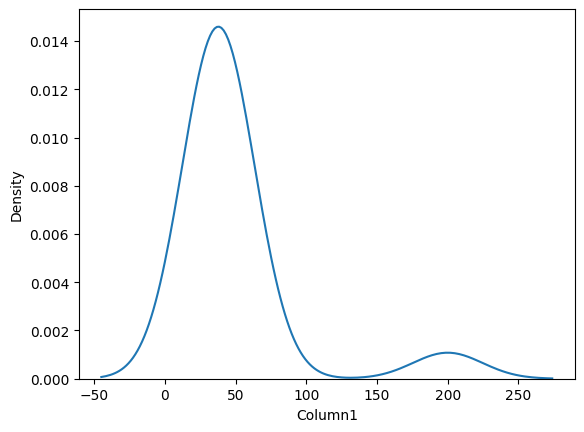

In [38]:
sns.kdeplot(df["Column1"])

<Axes: xlabel='Column2', ylabel='Density'>

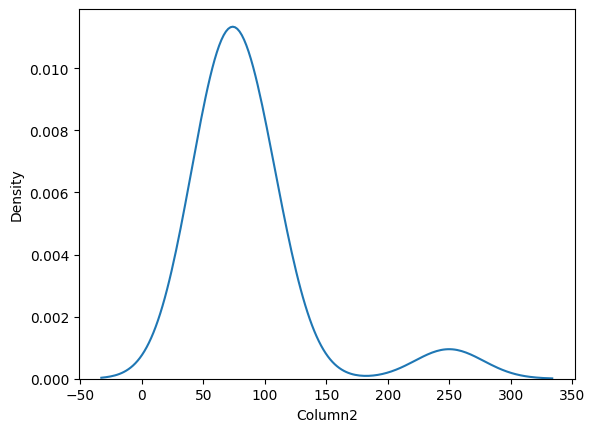

In [39]:
sns.kdeplot(df["Column2"])

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(df)
df2 = scaler.transform(df)

In [43]:
df2 = pd.DataFrame(df2, columns = df.columns)

In [44]:
df2

,Column1,Column2
0,-0.042364,-0.657585
1,-0.286771,0.031587
2,-0.360093,0.203880
3,-0.091245,-0.765268
4,-0.482297,-0.592975
5,-0.408975,-0.334535
6,0.006518,0.139270
7,-0.335653,3.520518
8,-0.384534,-0.549902
9,-0.408975,-0.571438


In [45]:
df2[(df2["Column1"]>3)|(df2["Column2"]>3)]

,Column1,Column2
7,-0.335653,3.520518
12,3.697068,0.268490


## Second Z Score Method

In [46]:
# (mean + 3*std)|(mean - 3*std)

In [47]:
upper_limit_c1 = df["Column1"].mean() + 3*df["Column1"].std()

In [48]:
upper_limit_c1

np.float64(175.7874275497058)

In [49]:
lower_limit_c1 = df["Column1"].mean() - 3*df["Column1"].std()
lower_limit_c1

np.float64(-78.32076088303914)

In [50]:
df[(df["Column1"]>176.4617)|(df["Column1"]<-80.7283)]

,Column1,Column2
12,200,99


In [51]:
upper_limit_c2 = df["Column2"].mean() + 3*df["Column2"].std()
lower_limit_c2 = df["Column2"].mean() - 3*df["Column2"].std()

In [52]:
df[(df["Column1"]>upper_limit_c1)|
   (df["Column1"]<lower_limit_c1)|
   (df["Column2"]>upper_limit_c2)|
   (df["Column2"]<lower_limit_c2)]

,Column1,Column2
7,35,250
12,200,99


### IQR Method to detect an outlier

In [53]:
q1 = df["Column1"].quantile(0.25)
q3 = df["Column1"].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [54]:
df[(df["Column1"]>upper_limit)|(df["Column1"]<lower_limit)]

,Column1,Column2
12,200,99


In [55]:
q1 = df["Column2"].quantile(0.25)
q3 = df["Column2"].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

df[(df["Column2"]>upper_limit)|(df["Column2"]<lower_limit)]

,Column1,Column2
7,35,250


In [29]:
from sklearn.datasets import load_boston

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_dict = load_boston()

In [ ]:
df = pd.DataFrame(data = data_dict.data, columns=data_dict.feature_names)
df.head()

In [ ]:
df["HOUSE_PRICE"] = data_dict.target

In [ ]:
df.tail()

In [ ]:
df[["CRIM"]].boxplot()

In [ ]:
q1 = df["CRIM"].quantile(0.25)
q3 = df["CRIM"].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [ ]:
df[(df["CRIM"]>upper_limit)]

In [ ]:
len(df[(df["CRIM"]>upper_limit)])/len(df)*100

In [ ]:
def check_outlier_percent(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1

    upper_limit = q3 + 1.5*IQR
    lower_limit = q1 - 1.5*IQR
    
    percent = len(df[(df[col]>upper_limit)])/len(df)*100
    
    return percent

In [ ]:
check_outlier_percent("INDUS")

In [ ]:
sns.kdeplot(df["AGE"])

In [ ]:
check_outlier_percent("AGE")

In [ ]:
df["AGE"].skew()

### How to handle the outliers ?

In [ ]:
1. Delete the observation
2. Imputation Technique
    1. Median
    2. mean
    3. upper tail (IQR upper whisker)
    4. lower tail (IQR lower whisker)
    5. static value
    6. Maximum or Minimum value

In [ ]:
q1 = df["CRIM"].quantile(0.25)
q3 = df["CRIM"].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [ ]:
upper_limit

In [ ]:
df.loc[df["CRIM"]>upper_limit]

In [ ]:
df.loc[df["CRIM"]>upper_limit] = upper_limit

In [ ]:
df[["CRIM"]].boxplot()

In [ ]:
sns.kdeplot(df["CRIM"])

### Handling Skew in the data

In [ ]:
df = pd.DataFrame(data = data_dict.data, columns=data_dict.feature_names)
df.head()

In [ ]:
df["HOUSE_PRICE"] = data_dict.target

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,20))
i = 1
for col in df.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(df[col])
    i+=1
    

In [ ]:
# df["CRIM"] = np.log1p(df["CRIM"])

In [ ]:
# sns.kdeplot(df["CRIM"])

In [ ]:
for col in df.loc[:,"CRIM":"LSTAT"].columns:
    if df[col].skew()>0.5:
        df[col] = np.log1p(df[col])
    elif df[col].skew() < -0.5:
        df[col] = np.sqrt(df[col])

In [ ]:
plt.figure(figsize=(20,20))
i = 1
for col in df.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(df[col])
    i+=1
    